<a href="https://colab.research.google.com/github/Gerda-T/AQI-Project/blob/master/Traffic_Sign_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# imports
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

In [1]:
# mounting google drive for data extraction
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# declaring data dir. directory contains: 
# labels.csv, ./traffic_data, ./traffic_data/TEST/{testImages}, ./traffic_data/DATA/{classN#}/,
data_path = '/content/drive/MyDrive/taffic43/'

In [10]:
classes =  pd.read_csv(data_path+'labels.csv')
class_names = list(classes['Name'])
print(class_names)

['Speed limit (5km/h)', 'Speed limit (15km/h)', 'Speed limit (30km/h)', 'Speed limit (40km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'speed limit (80km/h)', 'Dont Go straight or left', 'Dont Go straight or Right', 'Dont Go straight', 'Dont Go Left', 'Dont Go Left or Right', 'Dont Go Right', 'Dont overtake from Left', 'No Uturn', 'No Car', 'No horn', 'Speed limit (40km/h)', 'Speed limit (50km/h)', 'Go straight or right', 'Go straight', 'Go Left', 'Go Left or right', 'Go Right', 'keep Left', 'keep Right', 'Roundabout mandatory', 'watch out for cars', 'Horn', 'Bicycles crossing', 'Uturn', 'Road Divider', 'Traffic signals', 'Danger Ahead', 'Zebra Crossing', 'Bicycles crossing', 'Children crossing', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Unknown1', 'Unknown2', 'Unknown3', 'Go right or straight', 'Go left or straight', 'Unknown4', 'ZigZag Curve', 'Train Crossing', 'Under Construction', 'Unknown5', 'Fences', 'Heavy Vehicle Accidents'

In [11]:
classes.head(31)

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)
5,5,Speed limit (60km/h)
6,6,Speed limit (70km/h)
7,7,speed limit (80km/h)
8,8,Dont Go straight or left
9,9,Dont Go straight or Right


In [21]:
data_dir = data_path + 'traffic_Data/DATA/'
num_images = pd.DataFrame(class_names, columns=['label'])

In [22]:
count = []
for dir in os.listdir(data_dir):
    count.append(len(os.listdir(data_dir + dir)))
num_images['count'] = count
num_images.head(10)

,label,count
0,Speed limit (5km/h),162
1,Speed limit (15km/h),130
2,Speed limit (30km/h),128
3,Speed limit (40km/h),36
4,Speed limit (50km/h),22
5,Speed limit (60km/h),118
6,Speed limit (70km/h),142
7,speed limit (80km/h),138
8,Dont Go straight or left,40
9,Dont Go straight or Right,70


In [20]:
num_images.label.value_counts()

Bicycles crossing               2
Speed limit (40km/h)            2
Speed limit (50km/h)            2
Go left or straight             1
Road Divider                    1
Traffic signals                 1
Danger Ahead                    1
Zebra Crossing                  1
Children crossing               1
Dangerous curve to the left     1
Dangerous curve to the right    1
Unknown1                        1
Unknown2                        1
Unknown3                        1
Go right or straight            1
Speed limit (5km/h)             1
Unknown4                        1
Uturn                           1
Train Crossing                  1
Under Construction              1
Unknown5                        1
Fences                          1
Heavy Vehicle Accidents         1
Unknown6                        1
Give Way                        1
No stopping                     1
No entry                        1
Unknown7                        1
ZigZag Curve                    1
Horn          

<Figure size 432x288 with 0 Axes>

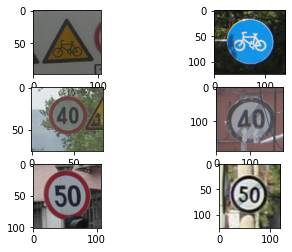

In [23]:
plt.figure()
fig, axs = plt.subplots(3, 2)
img = mpimg.imread( data_dir+'36/036_0001.png')
axs[0,0].imshow(img)
img = mpimg.imread( data_dir+'30/030_0001.png')
axs[0,1].imshow(img)
img = mpimg.imread( data_dir+'3/003_0001.png')
axs[1,0].imshow(img)
img = mpimg.imread( data_dir+'18/018_0001.png')
axs[1,1].imshow(img)
img = mpimg.imread( data_dir+'4/004_0001.png')
axs[2,0].imshow(img)
img = mpimg.imread( data_dir+'19/019_0001.png')
axs[2,1].imshow(img)

plt.show()

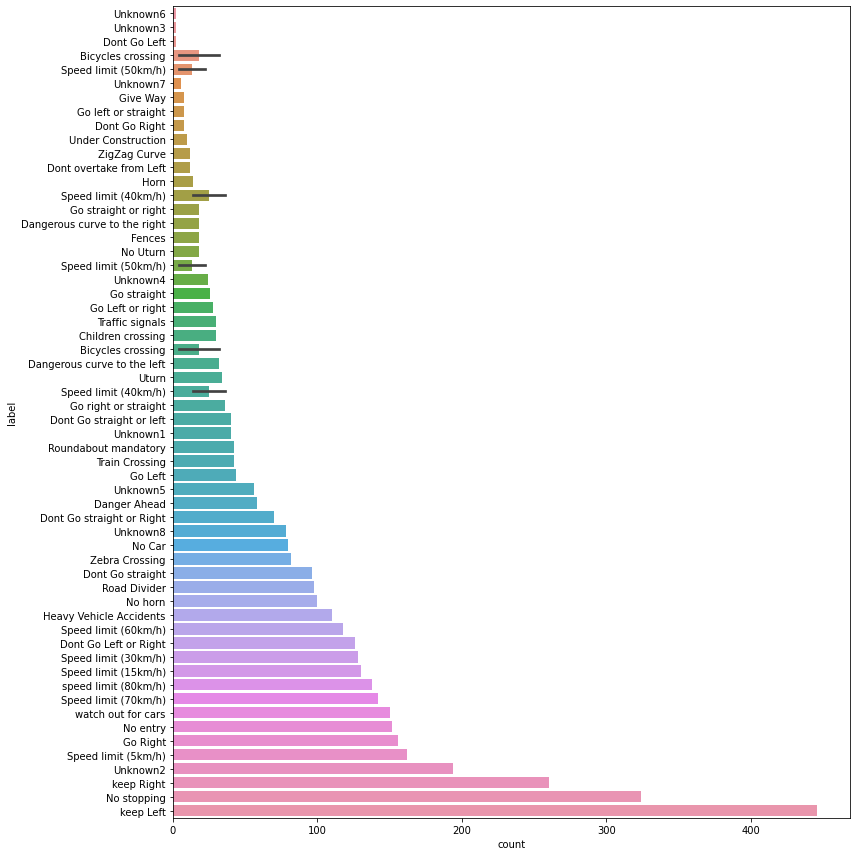

In [24]:
# plot graph
plt.figure(figsize=(12, 12))
sns.barplot(data=num_images, x=num_images["count"], y="label", order=num_images.sort_values("count").label)
plt.tight_layout()